In [1]:
import numpy as np
import numpy.ma as ma

import corner

import matplotlib.pyplot as plt
#%matplotlib notebook

import dynesty
from dynesty import plotting as dyplot

import emcee

import sys
sys.path.insert(1, '/Users/richardzhang/Documents/UR_Stuff/Research_UR/RotationCurve/2D_RC/main/')
#sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/Yifan_Zhang/RotationCurve/2D_RC/main/')
from RC_2D_Fit_Functions import Galaxy_Data, getTidal
from Velocity_Map_Functions_cython import rot_incl_iso, rot_incl_NFW, rot_incl_bur

from Velocity_Map_Functions import loglikelihood_iso_flat,\
                                   loglikelihood_NFW_flat,\
                                   loglikelihood_bur_flat,\
                                   loglikelihood_iso_flat_constraints,\
                                   loglikelihood_NFW_flat_constraints,\
                                   loglikelihood_bur_flat_constraints

import pickle

In [2]:
G = 6.674E-11  # m^3 kg^-1 s^-2
Msun = 1.989E30  # kg
scale = 0.136270089 

In [3]:
#d_result = np.load("../dynesty_results_7495-12704_comb.npy",allow_pickle=True)
f_input = open("../dynesty_results_7495-12704_comb.pickle",'rb')
d_result = pickle.load(f_input)
f_input.close()

In [10]:
type(d_result)

numpy.ndarray

In [5]:
labels = ['log_rhob0','R_b', 'Sigma_d','R_d','rho_h','R_h','i','phi','x','y','vsys']
truths = [0.879029737,4.998864286,2058.505154,19.85417227,1.062853006,0.484093619,0.584995383,2.077845538,43.68893541,6.00004005,99.99993356]

In [8]:
d_result['niter']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

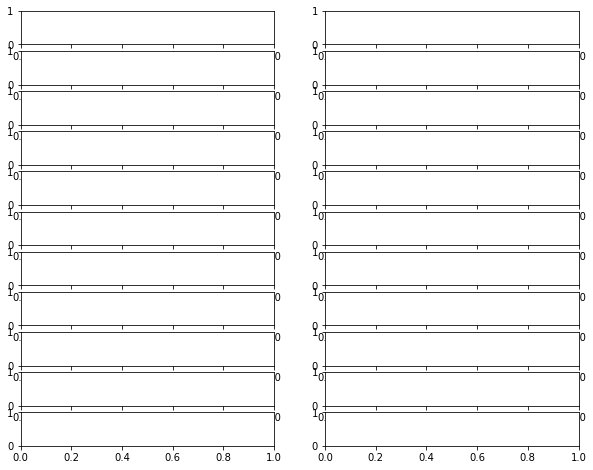

In [58]:
fig, axes = dyplot.traceplot(d_result, truths=truths, labels=labels,
                             fig=plt.subplots(11, 2, figsize=(10,8)),
                             thin=10)

In [32]:
figure = corner.corner(d_result, labels=labels,
                       range=[(-7,1), (0,5), #(-8,0), (0,6), # Bulge density, radius
                              (0.1,3000), (0.1,30), # Disk density, radius
                              (-7,-2), (0,500), #(-8,2), (0,20), # Halo density, radius
                              (0,0.436*np.pi), # Inclination angle
                              (0,2*np.pi), # Rotation angle
                              (10,50), (10,50), # Center x, y
                              (-100,100)], # systemic velocity
                       bins=30,smooth=1,
                       truths=truths, 
                       truth_color='#ff4444',
                       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
                       quantiles=(0.16, 0.84),
                       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                       color='blue', plot_datapoints=False,
                       fill_contours=True)

ValueError: Dimension mismatch between samples and range